In [1]:
import pandas as pd
from os.path import join, dirname, isdir
import seaborn as sns
import matplotlib.pyplot as plt

Combine all results data

In [62]:
models = '../models'
def get_data(models, dirname):
    try:
        data  = pd.read_csv(join(models, dirname, 'epoch_loss.csv'))
        optim = pd.read_csv(join(models, dirname, 'optimizer.csv'))
    except:
        return None
    data['dirname'] = dirname
    data['job_id'] = data['dirname'].str.extract(r'(.*)_[0-9]+')
    # assign optimizer properties
    data['optimizer']     = optim['name'].values[0]
    data['learning_rate'] = optim['learning_rate'].values[0]
    # optim = optim.rename(columns={'name': 'optimizer'})
    # data = data.assign(**optim[['optimizer', 'learning_rate']].iloc[0].to_dict())
    return data

jobs = filter(lambda p: isdir(join(models, p)), os.listdir(models))
df = pd.concat([get_data(models, job) for job in jobs])
df

,epoch,accuracy,categorical_accuracy,epoch_time,loss,top_k_categorical_accuracy,val_accuracy,val_categorical_accuracy,val_loss,val_top_k_categorical_accuracy,dirname,job_id,optimizer,learning_rate
0,0,0.960651,0.960651,1187.640418,0.145986,0.998803,0.220177,0.220177,13.694115,0.228467,18089307_4,18089307,Nadam,0.001
1,1,0.961517,0.961517,1089.068708,0.138320,0.999613,0.230705,0.230705,13.378916,0.230705,18089307_4,18089307,Nadam,0.001
2,2,0.961213,0.961213,1099.932372,0.151486,0.999926,0.230705,0.230705,11.557586,0.230705,18089307_4,18089307,Nadam,0.001
3,3,0.960577,0.960577,1099.001507,0.168548,1.000000,0.230705,0.230705,11.017899,0.230705,18089307_4,18089307,Nadam,0.001
4,4,0.959988,0.959988,1097.658838,0.181303,0.999926,0.230705,0.230705,12.613845,0.230705,18089307_4,18089307,Nadam,0.001
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,95,0.042739,0.042739,440.647626,3.279452,0.213601,0.000000,0.000000,3.322096,0.000000,18102942_2,18102942,Adam,0.001
96,96,0.070869,0.070869,437.395817,3.251314,0.213601,0.000000,0.000000,3.321811,0.088369,18102942_2,18102942,Adam,0.001
97,97,0.029880,0.029880,446.031597,3.292021,0.265182,0.000000,0.000000,3.322096,0.000000,18102942_2,18102942,Adam,0.001
98,98,0.083911,0.083911,439.219361,3.238110,0.176186,0.000000,0.000000,3.322096,0.000000,18102942_2,18102942,Adam,0.001


In [63]:
df.groupby(['optimizer', 'learning_rate']).mean()[['epoch_time']]

,,epoch_time
optimizer,learning_rate,
Adadelta,0.001,500.666532
Adagrad,0.001,506.942815
Adam,0.001,484.596591
Adamax,0.001,501.443727
Ftrl,0.001,444.800937
Nadam,0.001,530.957348
RMSprop,0.001,506.030557
SGD,0.010,480.356632


In [64]:
data = df[df['job_id'].isin(['18102942', '18105570'])]
data.shape

(800, 14)

In [65]:
molten = data.melt(id_vars=['epoch', 'optimizer'],
                   var_name='metric',
                   value_vars=['loss', 'val_loss'],
                   value_name='accuracy')\
             .sort_values('optimizer')
molten

,epoch,optimizer,metric,accuracy
600,0,Adadelta,loss,3.256043
1473,73,Adadelta,val_loss,3.296139
1472,72,Adadelta,val_loss,3.296018
1471,71,Adadelta,val_loss,3.295895
1470,70,Adadelta,val_loss,3.295775
...,...,...,...,...
1370,70,SGD,val_loss,3.322080
1371,71,SGD,val_loss,3.321515
1372,72,SGD,val_loss,3.320309
1362,62,SGD,val_loss,3.322096


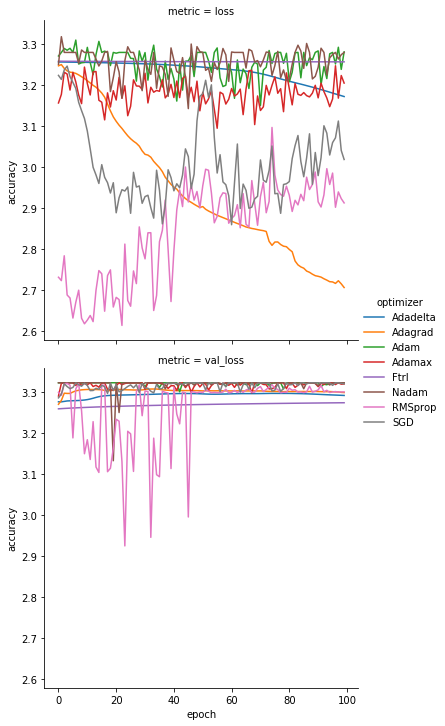

In [66]:
sns.relplot(data=molten, x='epoch', y='accuracy',
    hue='optimizer', kind='line', row='metric')
# plt.ylim(0, 1)